### LinearRegression: Ridge and Lasso

### House-Price-Prediction


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
csv_file_path = "boston_housing.csv"
dataset = pd.read_csv(csv_file_path)

In [71]:
dataset.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Note : 
- Independent_features (X) :   "crim-zn-indus-chas-nox-rm-age-dis-rad-tax-ptratio-b-lstat-Price"
- Dependent_variable (Y)   :   "0-1-2-3-4-5-6-7-8-9"

In [72]:
dataset.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'Price'],
      dtype='object')

In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [74]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [75]:
##  Extract the independent features (X) using iloc
##  which selects all rows (:) and all columns except the last one (:-1).

x = dataset.iloc[:,:-1]                                         ## independent_features_x

## Extract the dependent variable (y) using iloc
## which selects all rows (:) and only the last column (-1)

y = dataset.iloc[:, -1]                                         ## dependent_variable_y

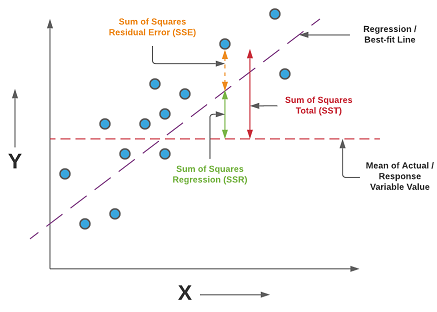

In [76]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [77]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()

## calculates the mean squared error (MSE) for a linear regression model using cross-validation.
## cv=5: In this case, it is set to 5, meaning the dataset will be divided into 5 folds for cross-validation.
mse=cross_val_score(lin_reg ,  x ,  y , scoring='neg_mean_squared_error' , cv=5) 
mean_mse=np.mean(mse)
print(mean_mse)

-37.13180746769923


### Ridge Regression

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

#### Parameters:
- class sklearn.linear_model.Ridge ( ):
    - alpha=1.0
    - fit_intercept=True
    - copy_X=True
    - max_iter=None
    - tol=0.0001
    - solver='auto'
    - positive=False
    - random_state=None

#### Attributes:
- class sklearn.linear_model.Ridge ( ):
    - coef_
    - intercept_
    - n_iter_
    - n_features_in_
    - feature_names_in_  
 
#### Methods :
- class sklearn.linear_model.Ridge ( ):
    - fit(X, y[, sample_weight]) : Fit Ridge regression model.
    - get_params([deep]) : Get parameters for this estimator.
    - predict(X) : Predict using the linear model.
    - score(X, y[, sample_weight]) : Return the coefficient of determination of the prediction.
    - set_params(**params) : Set the parameters of this estimator.

In [79]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()

params = {'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge,params,scoring = "neg_mean_squared_error",cv=10)
ridge_regressor.fit(x , y)


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [80]:
ridge_regressor.best_params_

{'alpha': 100}

In [81]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.615220097335133


### Compare two result dataframes :

- For Linear Regression result ==== -37.13180746769923  ( We selected Linear Regression)
    - performance is good .
    
- For Ridge result ================ -29.615220097335133
    - reduce a over-fitting
    - performance is not good .


### Lasso Regression

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

#### Parameters:
- class sklearn.linear_model.Ridge ( ):
    - alpha : float, default=1.0
    - fit_intercept : bool, default=True
    - copy_X : bool, default=True
    - max_iter : int, default=1000
    - tol : float, default=1e-4
    - precompute : bool or array-like of shape (n_features, n_features), default=False
    - positive : bool, default=False
    - selection{‘cyclic’, ‘random’}, default=’cyclic’
    - random_state : int, RandomState instance, default=None
    - warm_start : bool, default=False

#### Attributes:
- class sklearn.linear_model.Ridge ( ):
    - coef_ : ndarray of shape (n_features,) or (n_targets, n_features)
    - dual_gap_ : float or ndarray of shape (n_targets,) 
    - sparse_coef_ : sparse matrix of shape (n_features, 1) or (n_targets, n_features)
    - intercept_ : float or ndarray of shape (n_targets,)
    - n_iter_ : int or list of int
    - n_features_in_ : int
    - feature_names_in_ : ndarray of shape (n_features_in_,)
 
#### Methods :
- class sklearn.linear_model.Ridge ( ):
    - fit(X, y[, sample_weight]) : Fit Ridge regression model.
    - get_params([deep]) : Get parameters for this estimator.
    - predict(X) : Predict using the linear model.
    - score(X, y[, sample_weight]) : Return the coefficient of determination of the prediction.
    - set_params(**params) : Set the parameters of this estimator.
    - path(X, y, *[, l1_ratio, eps, n_alphas, ...]) : Compute elastic net path with coordinate descent.

In [82]:
from sklearn.linear_model import Lasso 
from sklearn.model_selection import GridSearchCV
lasso = Lasso()

params = {'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}   ## For alpha add more data (30,35,40,45,50,55,100)
lasso_regressor = GridSearchCV(lasso,params,scoring = "neg_mean_squared_error",cv=10)
lasso_regressor.fit( x , y )


c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.100e+03, tolerance: 4.070e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.635e+03, tolerance: 4.117e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [83]:
lasso_regressor.best_params_

{'alpha': 0.01}

In [84]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-34.45554381307912


### train_test_split

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

- sklearn.model_selection.train_test_split (*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)


In [85]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


### Compare three result  :

- For Linear Regression result-----> -37.13180746769923  
    
- For Ridge result------------ ----> -29.615220097335133 

- For Lasso result-----------------> -34.45554381307912


### train_test_split:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [86]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
lin_reg.fit(x_train , y_train )   
mse=cross_val_score(lin_reg , x_train , y_train , scoring='neg_mean_squared_error' , cv=5) 
mean_mse=np.mean(mse)
print(mean_mse)

-25.18787473928514


In [88]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()

params = {'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge,params,scoring = "neg_mean_squared_error",cv=10)
ridge_regressor.fit(x_train , y_train)


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [89]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-25.472067363367742


In [90]:
from sklearn.linear_model import Lasso 
from sklearn.model_selection import GridSearchCV
lasso = Lasso()

params = {'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}   ## For alpha add more data (30,35,40,45,50,55,100)
lasso_regressor = GridSearchCV(lasso,params,scoring = "neg_mean_squared_error",cv=10)
lasso_regressor.fit(x_train , y_train)

c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.382e+03, tolerance: 2.712e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.879e+03, tolerance: 2.557e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [91]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-25.473094572833244


### Compare after train_test_split  :

- train_test_split-----------------> -25.18787473928514 ------>(The performance is better than other result because going to ZERO (0))
    
- For Ridge result------------ ----> -25.472067363367742

- For Lasso result-----------------> -25.473094572833244

In [92]:
lasso_regressor.predict(x_test)

array([28.53469457, 36.61870038, 15.63751051, 25.50144953, 18.70967356,
       23.16471553, 17.31011033, 14.0773636 , 23.01064349, 20.5422349 ,
       24.91632311, 18.41098048, -6.52079694, 21.83372577, 19.14903066,
       26.05873213, 20.30232607,  5.74943563, 40.33137805, 17.4579146 ,
       27.47486675, 30.21707564, 10.80555628, 23.8772175 , 17.99492226,
       16.02608761, 23.26828778, 14.36825218, 22.38116931, 19.30920694,
       22.17284558, 25.05925451, 25.13780726, 18.46730239, 16.60405678,
       17.46564111, 30.71367735, 20.05106816, 23.98977653, 24.94322399,
       13.97945361, 31.64706961, 42.48057194, 17.70042803, 26.92507866,
       17.15897728, 13.68918092, 26.14924236, 20.27823036, 29.99003508,
       21.21260346, 34.03649177, 15.41837559, 25.95781066, 39.13897287,
       22.9611842 , 18.8031058 , 33.07865363, 24.74384153, 12.83640948,
       22.41963416, 30.64804998, 31.5956712 , 16.34088222, 20.95043064,
       16.70145827, 20.23215651, 26.1437865 , 31.12160899, 11.89

### sklearn.metrics.r2_score

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

- - sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)

#### Parameters:
- class sklearn.metrics.r2_score:
    - y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
    - y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
    - sample_weight : array-like of shape (n_samples,), default=None
    - multioutput : {‘raw_values’, ‘uniform_average’, ‘variance_weighted’}, array-like of shape (n_outputs,) 
    - raw_values :
    - uniform_average :
    - variance_weighted :
    - force_finitebool, default=True

#### Returns:
- class sklearn.metrics.r2_score:
    - z : float or ndarray of floats

### Lasso :

In [93]:
y_pred = lasso_regressor.predict(x_test)
from sklearn.metrics import r2_score


r2_score1=r2_score(y_pred, y_test)
r2_score_percentage = r2_score1 * 100

In [94]:
print("R-squared score: {:.2f}%".format(r2_score_percentage))

R-squared score: 67.10%


### Ridge :

In [95]:
y_pred = ridge_regressor.predict(x_test)
from sklearn.metrics import r2_score


r2_score1=r2_score(y_pred, y_test)
r2_score_percentage = r2_score1 * 100

In [96]:
print("R-squared score: {:.2f}%".format(r2_score_percentage))

R-squared score: 67.09%


### Liner Regression :

In [97]:
y_pred = lin_reg.predict(x_test)
from sklearn.metrics import r2_score


r2_score1=r2_score(y_pred, y_test)
r2_score_percentage = r2_score1 * 100

In [98]:
print("R-squared score: {:.2f}%".format(r2_score_percentage))

R-squared score: 67.10%


### Compare after sklearn.metrics.r2_score :

- For linear regression result-----------------> 0.6709558976744432

- For Ridge result ----------------------------> 0.6708743257533069

- For Lasso result ----------------------------> 0.6709558959121945

### Logistic Regression :

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html



#### Parameters:
- class sklearn.metrics.r2_score:
    - penalty : {‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
    - dual : bool, default=False 
    - tol : float, default=1e-4 
    - C : float, default=1.0
    - fit_intercept : bool, default=True
    - intercept_scaling : float, default=1 
    - class_weight : dict or ‘balanced’, default=None
    - random_state : int, RandomState instance, default=None
    - solver : {‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’ 
    - And ...........

#### Attributes:
- classes_ : ndarray of shape (n_classes, ) 
- coef_ : ndarray of shape (1, n_features) or (n_classes, n_features)
- intercept_ : ndarray of shape (1,) or (n_classes,)
- n_features_in_ : int
- And ..........


### Notes (load_breast_cancer)
-----
- Data Set Characteristics:
    - :Number of Instances: 569

    - :Number of Attributes: 31 numeric, predictive attributes and the class

    - :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)


In [99]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression


df = pd.read_csv('breast_cancer.csv')

In [100]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [101]:
df.keys()

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'target'],
      dtype='object')

In [102]:
## Check the data types of each column
df.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [103]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [104]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [105]:
# Load the dataset
df = pd.read_csv('breast_cancer.csv')

In [106]:
# Independent features (X) and dependent variable (y)

x = pd.DataFrame(df.iloc[:, :-1].values, columns=df.columns[:-1])
## selecting all rows and all columns except the last column from the original DataFrame df

In [107]:
y = pd.DataFrame(df.iloc[:, -1].values, columns=['Target'])

In [108]:
y

,Target
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [109]:
type(y)

pandas.core.frame.DataFrame

In [110]:
y["Target"].value_counts()

##  This is a function that calculates the count of each unique value in the selected column
##  357 occurrences of the value 0 and 212 occurrences of the value 1 in the "Target" column

Target
0    357
1    212
Name: count, dtype: int64

In [111]:
# Scale the features using StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [112]:
## Split the scaled data into training and testing sets :

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=42)


In [113]:
# Define the parameter grid for GridSearchCV
## This dictionary specifies the hyperparameter C for the logistic regression model.
## This code is commonly used in hyperparameter tuning to specify different values for different hyperparameters 
## and search for the best combination of hyperparameters for the model.

params = [{'C': [1, 5, 10]}, {'max_iter': [100, 150]}]


In [114]:
# Create an instance of Logistic Regression

model_1 = LogisticRegression(C=100, max_iter=100)

In [115]:
# Perform grid search with cross-validation

model = GridSearchCV(model_1, param_grid=params, scoring='f1', cv=5)

In [116]:
# Fit the model on the training data:
## The ravel() function is used to convert the target variable into a 1-dimensional array if it is not already.

model.fit(x_train, y_train.values.ravel())  

c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Farshid Hesami\anaconda3\envs\env1\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid=[{'C': [1, 5, 10]}, {'max_iter': [100, 150]}],
             scoring='f1')

In [117]:
# Print the best parameters and best score

print("Best Parameters: ", model.best_params_)
print("Best Score: ", model.best_score_)

Best Parameters:  {'C': 1}
Best Score:  0.9717726133515606


In [118]:
# Make predictions on the test data :

y_pred = model.predict(x_test)

In [119]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

Confusion Matrix:


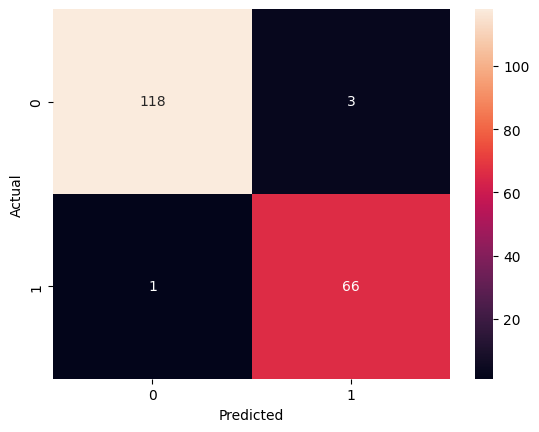

In [120]:
### from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
### import seaborn as sns

# Calculate and print the confusion matrix

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

sns.heatmap(confusion_mat, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


In [121]:
# Calculate and print the accuracy score

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))


Accuracy: 97.87%


In [122]:
### from sklearn.metrics import classification_report

print("Classification Report:")
report = classification_report(y_test, y_pred)
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       121
           1       0.96      0.99      0.97        67

    accuracy                           0.98       188
   macro avg       0.97      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



### Result : 

- This table summarizes the best parameters, best score, accuracy, precision, recall, F1-score, and support for each class based on the best performance achieved.

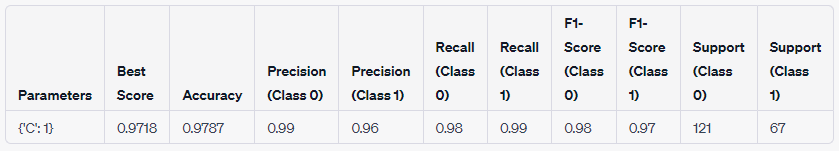

- "support" refers to the number of samples or instances in the dataset that belong to a particular class. It represents the number of observations that are classified as a specific class.

- In the classification report you provided, the "support" column represents the number of instances for each class. In your case, it shows that there are 121 instances of class 0 and 67 instances of class 1. The support values help provide additional context and understanding of the classification performance by indicating the distribution of instances across different classes.


### EDA (Exploratory Data Analysis)

In [123]:
### import pandas as pd
### import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
# Explore the structure of the dataset :

print("Dataset Shape:", df.shape)
print("\nDataset Columns:\n", df.columns)
print("\nData Types:\n", df.dtypes)

Dataset Shape: (569, 31)

Dataset Columns:
 Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'target'],
      dtype='object')

Data Types:
 radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean        

In [125]:
# Check for missing values :


print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
target                     0
dtype: int64


In [126]:
# Generate descriptive statistics :

print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
        radius_mean  texture_mean  perimeter_mean    area_mean   
count   569.000000    569.000000      569.000000   569.000000  \
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean   
count       569.000000        569.000000      569.000000           569.000000  \
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000        

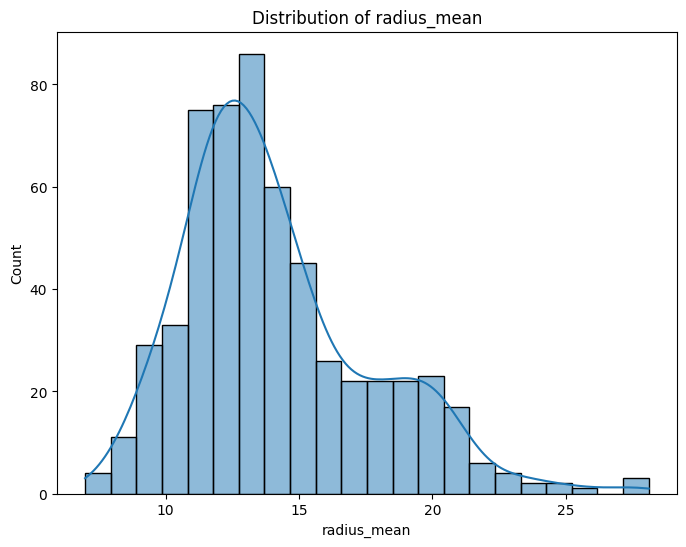

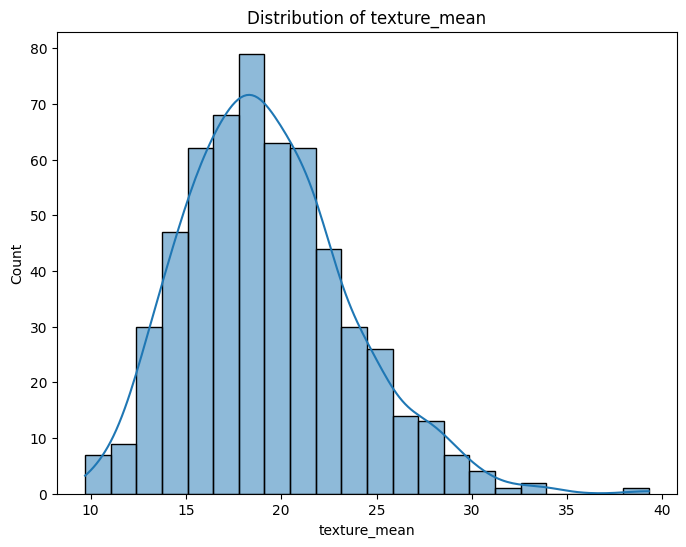

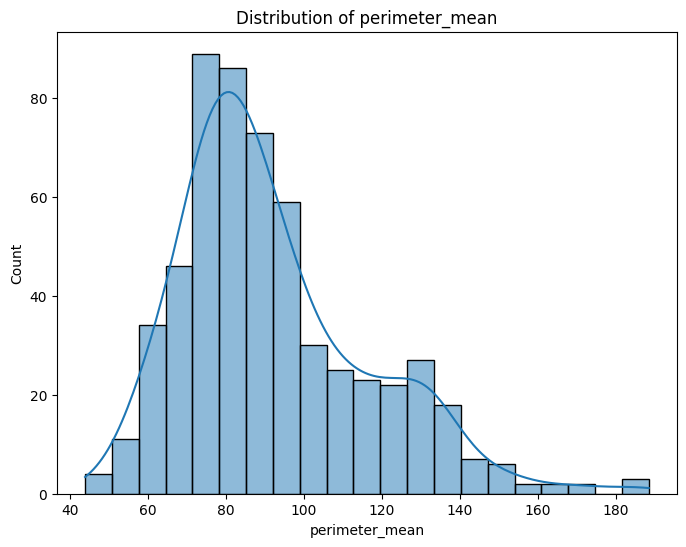

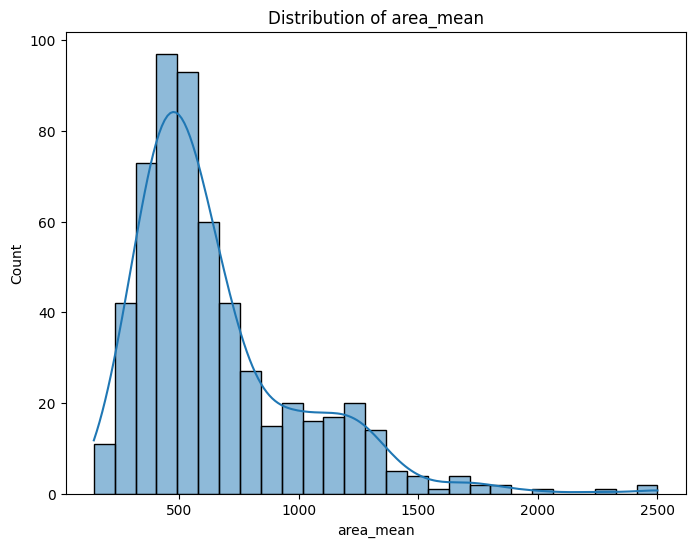

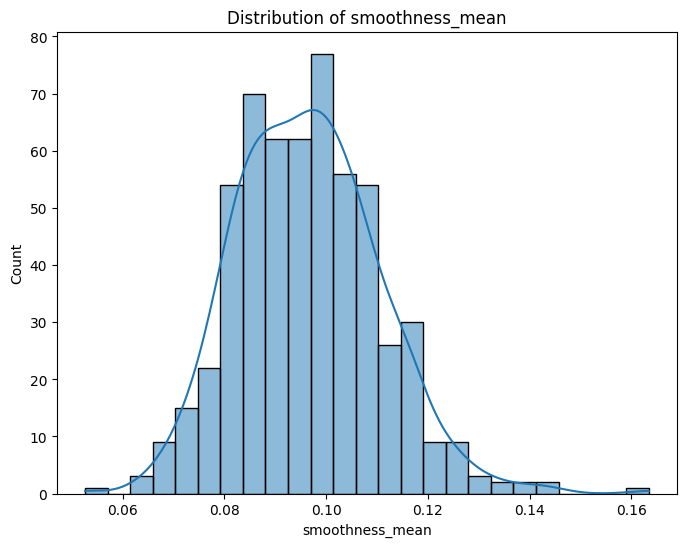

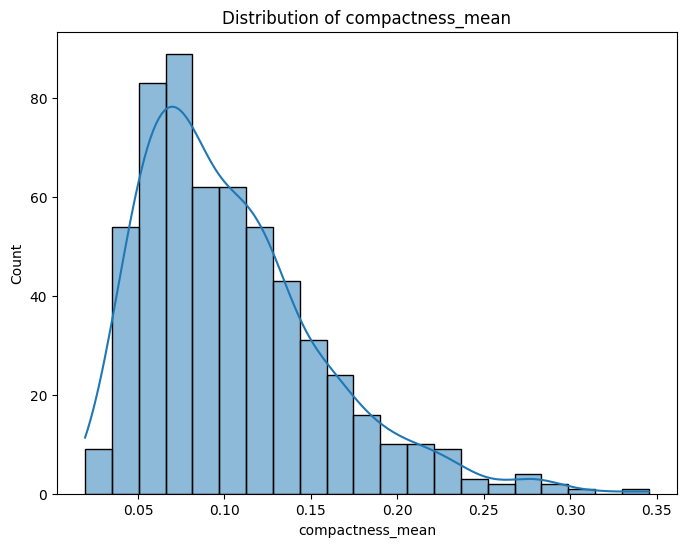

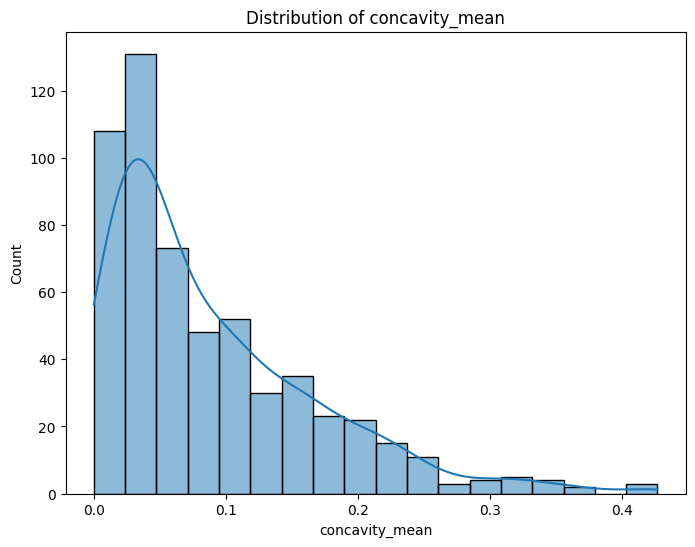

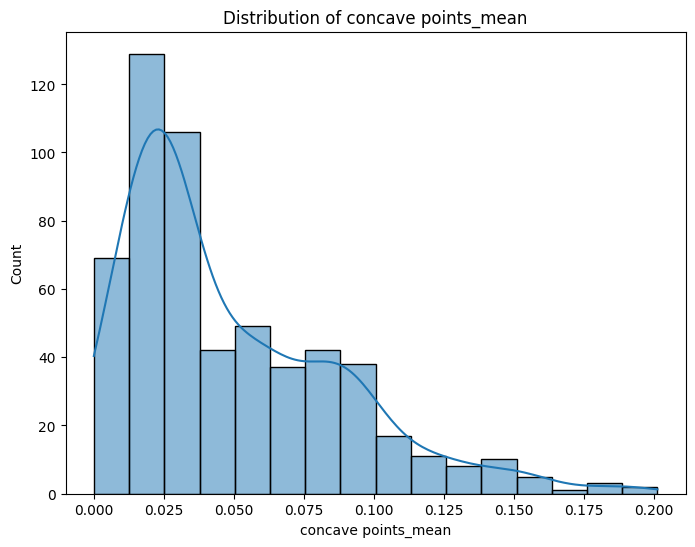

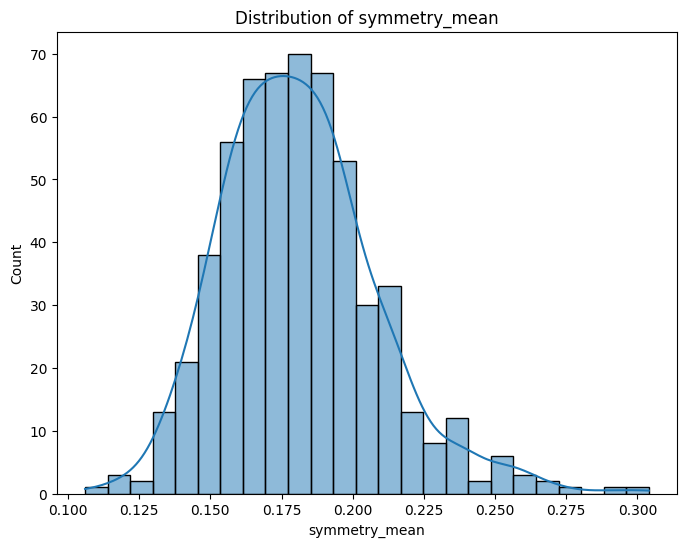

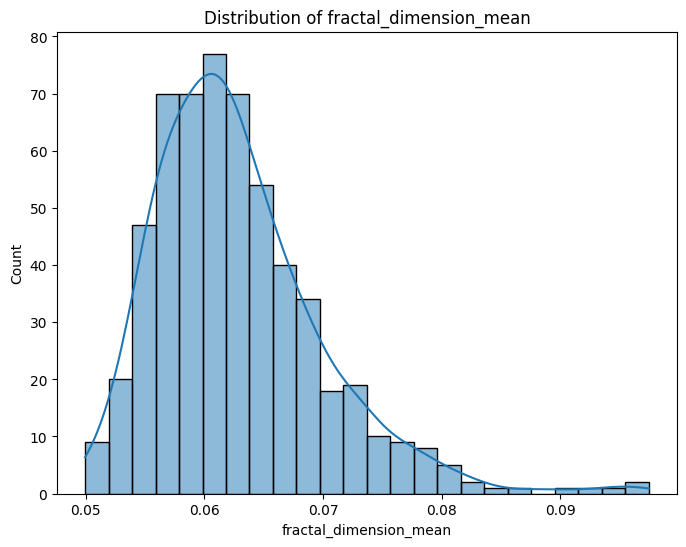

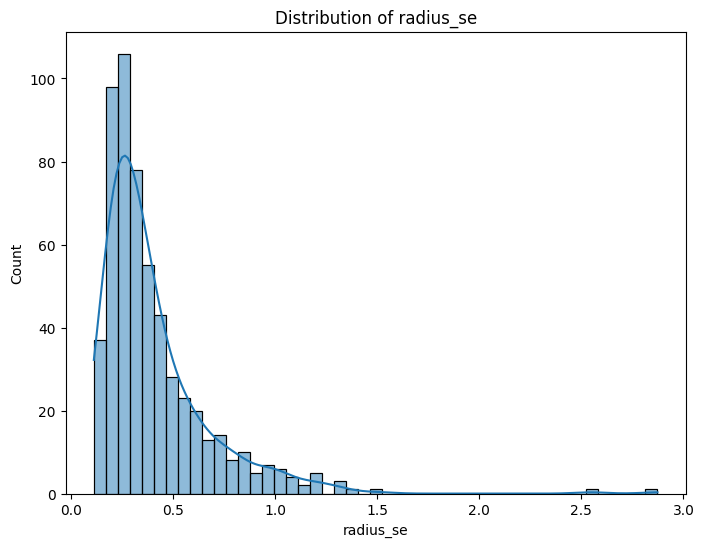

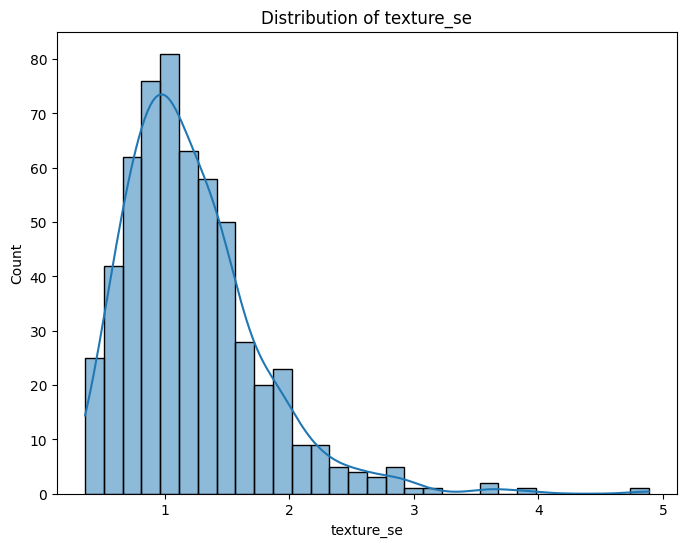

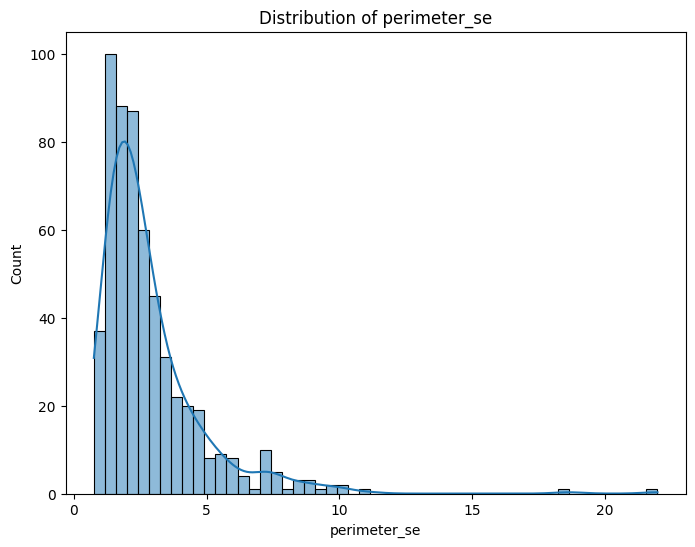

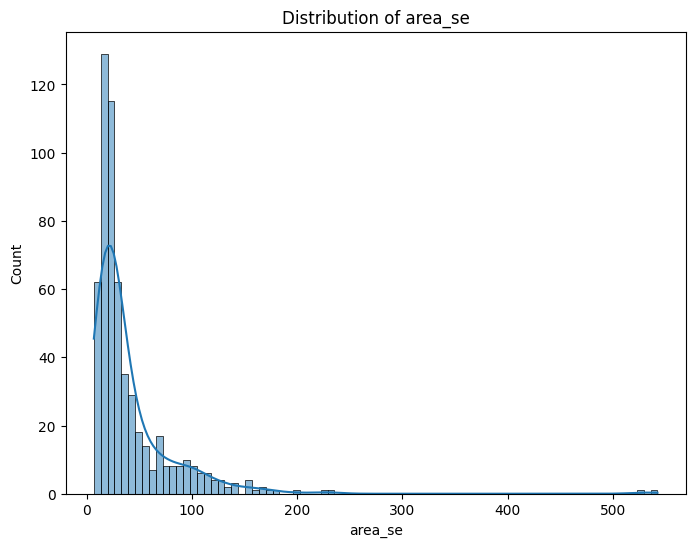

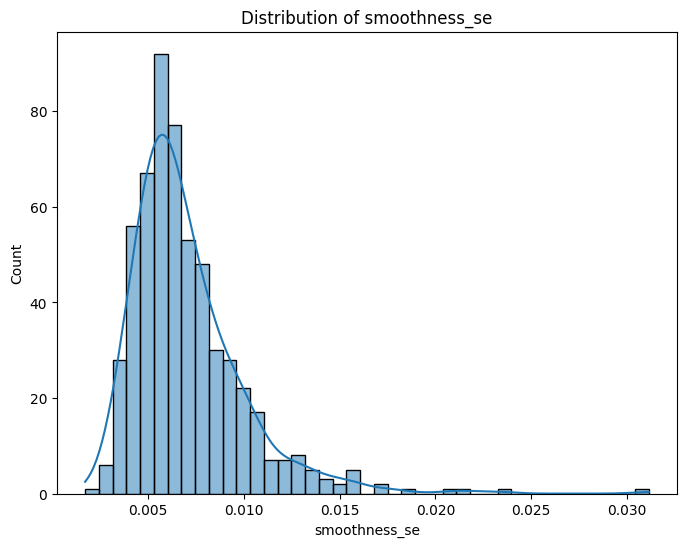

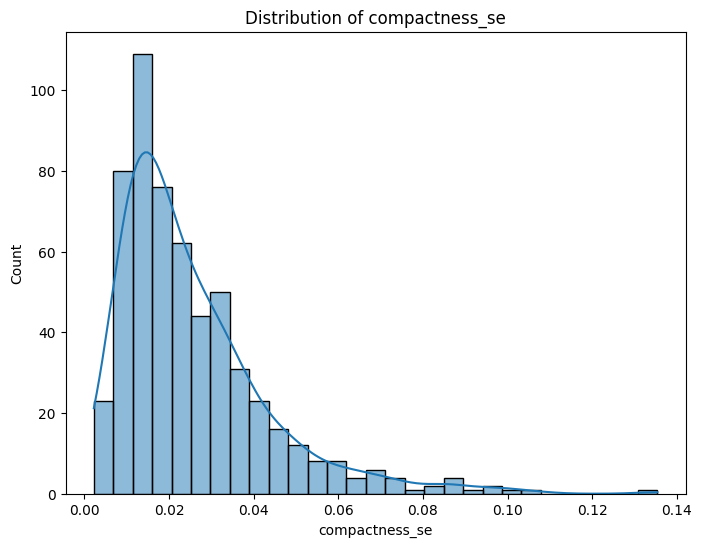

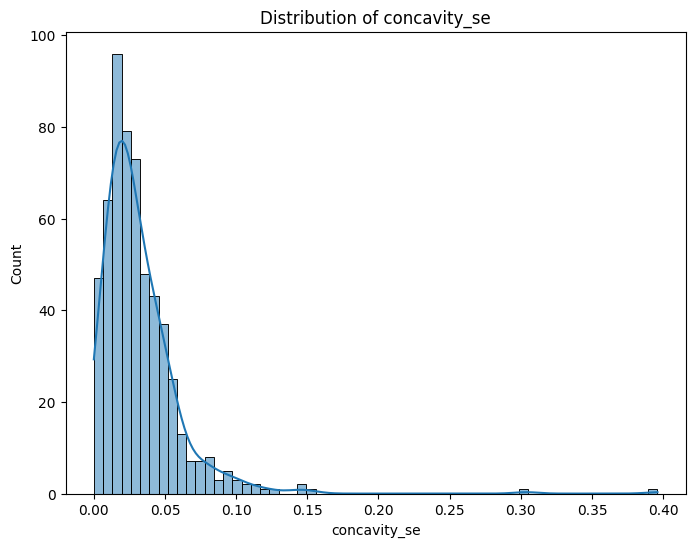

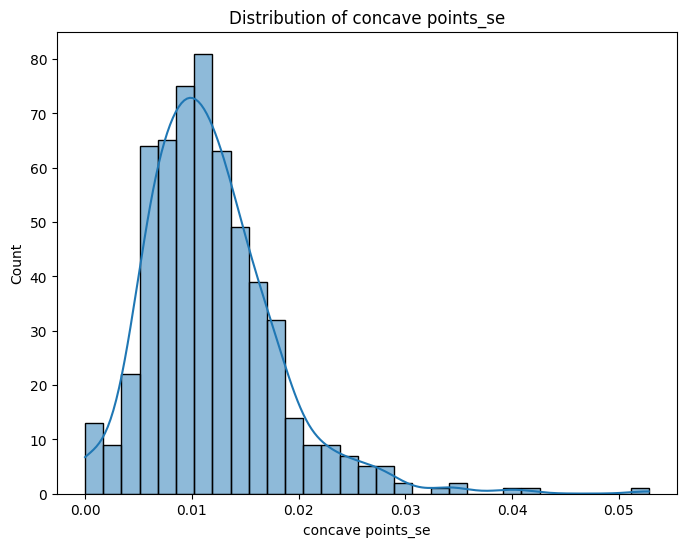

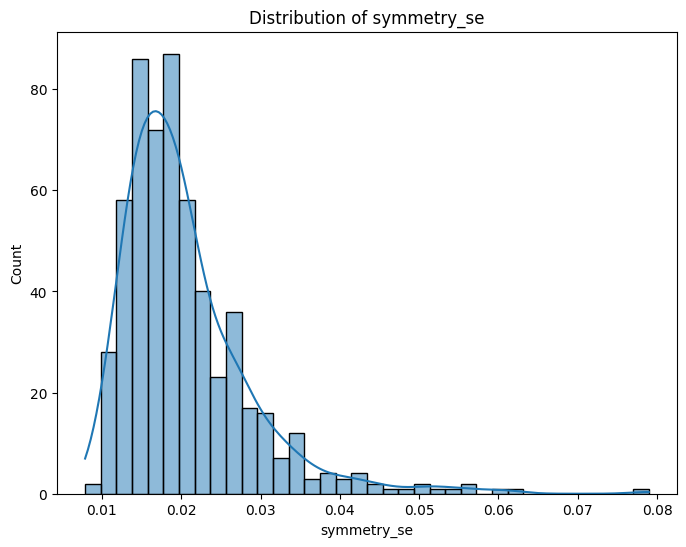

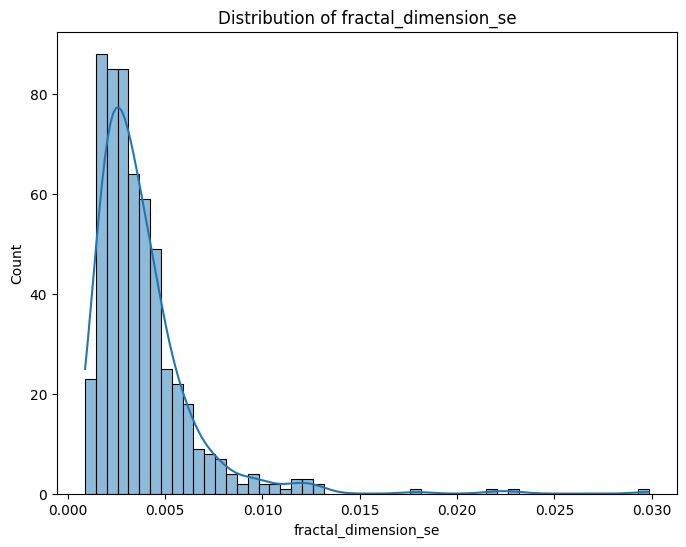

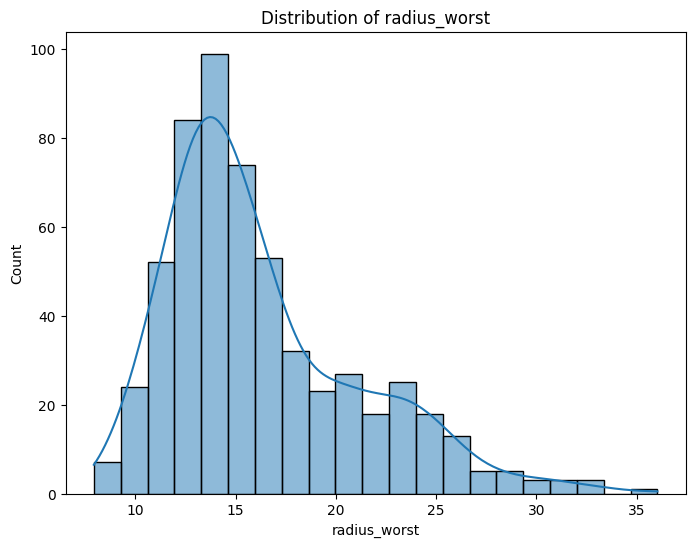

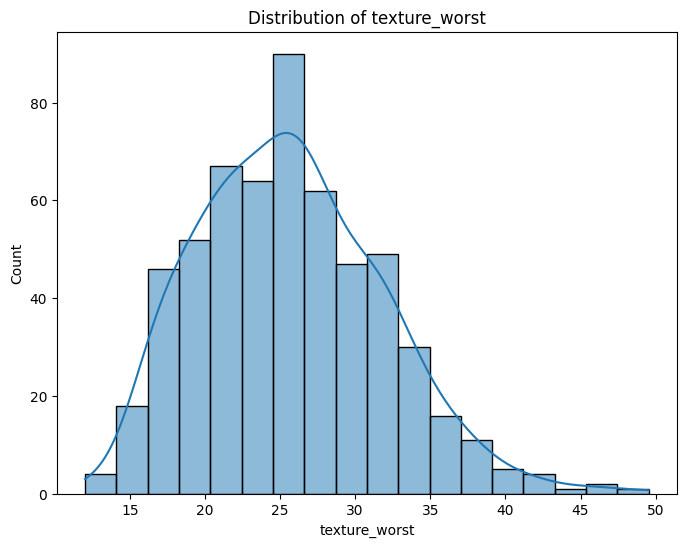

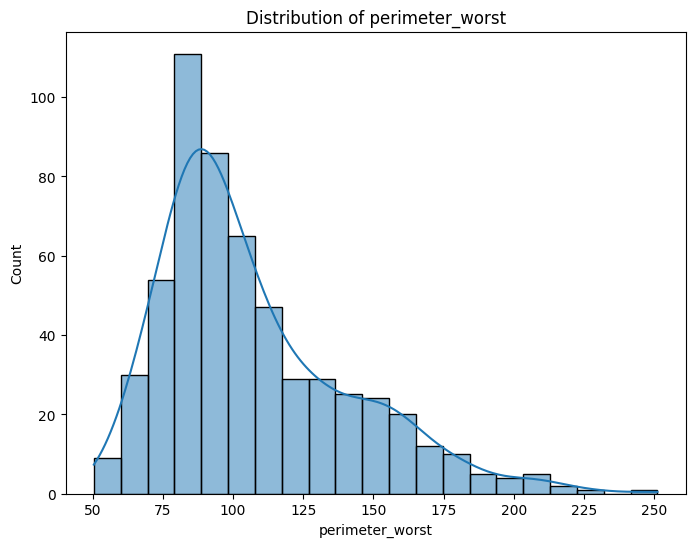

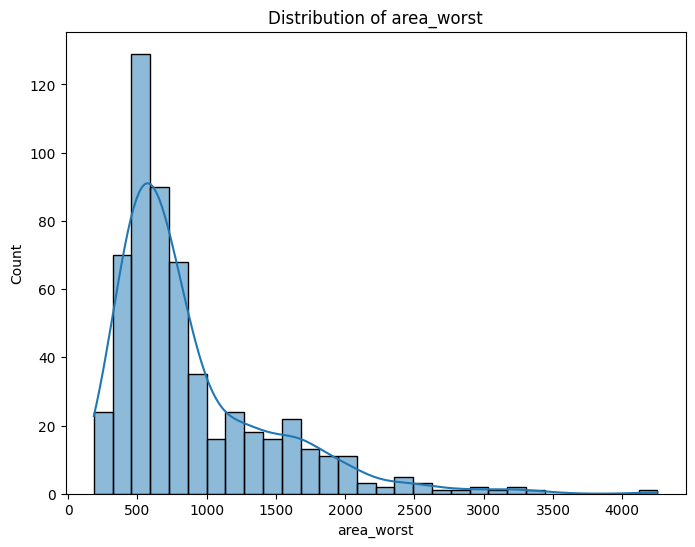

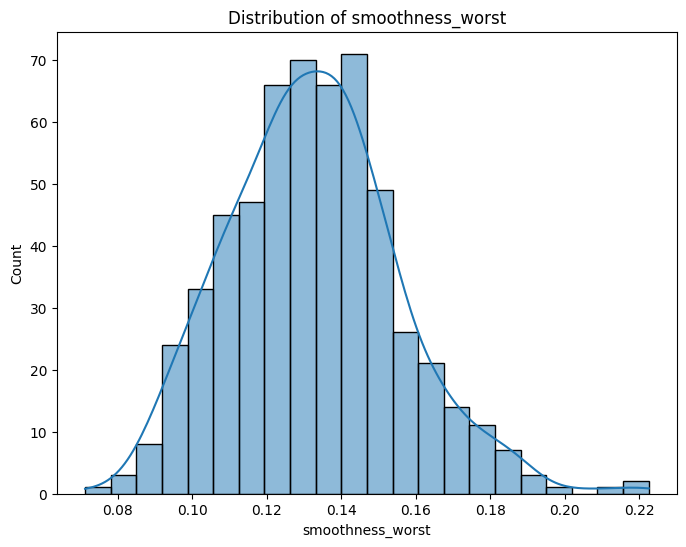

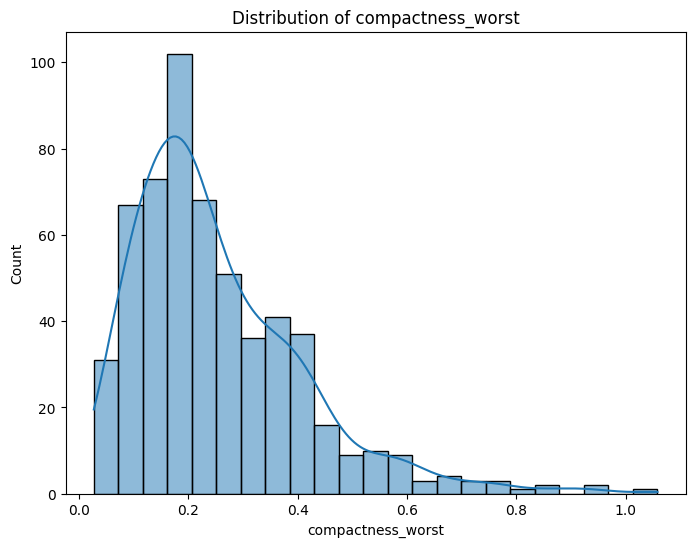

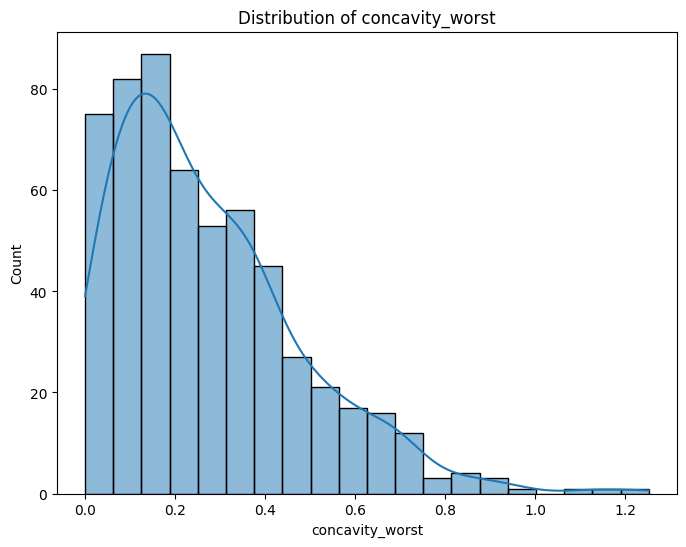

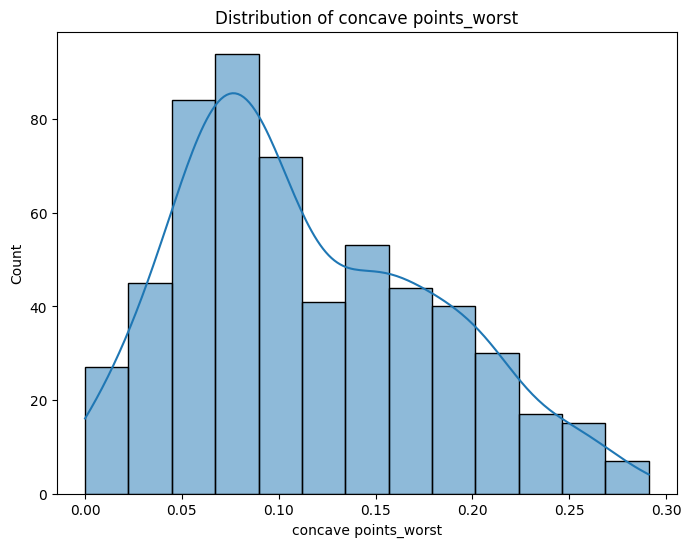

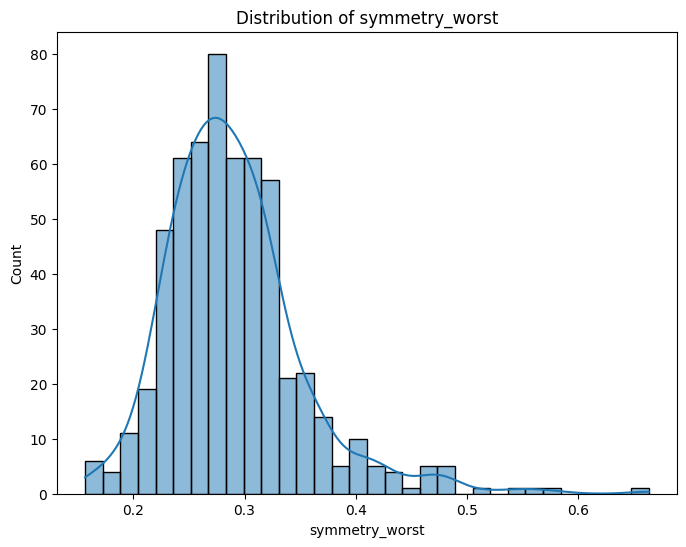

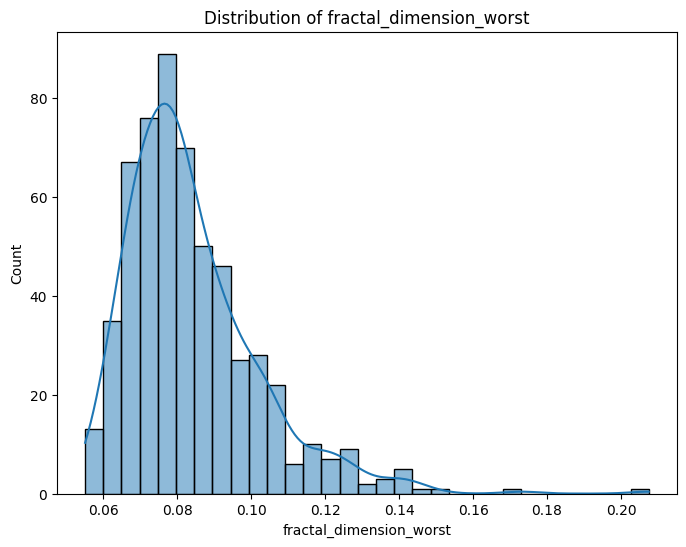

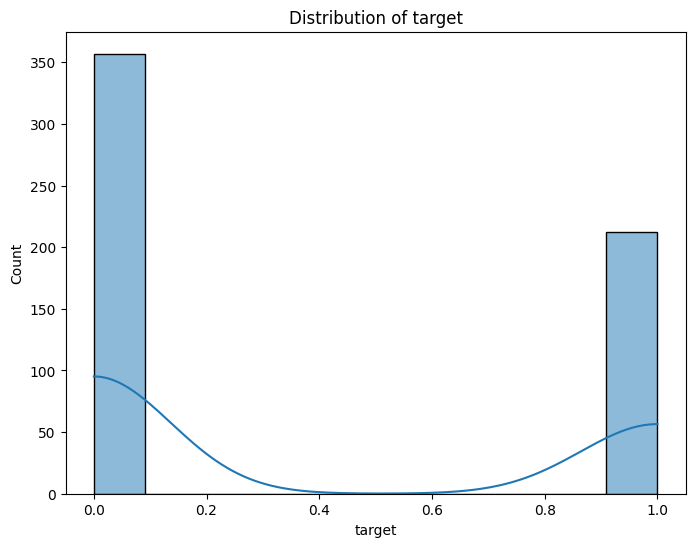

In [127]:
# Explore the distribution of numerical features :

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

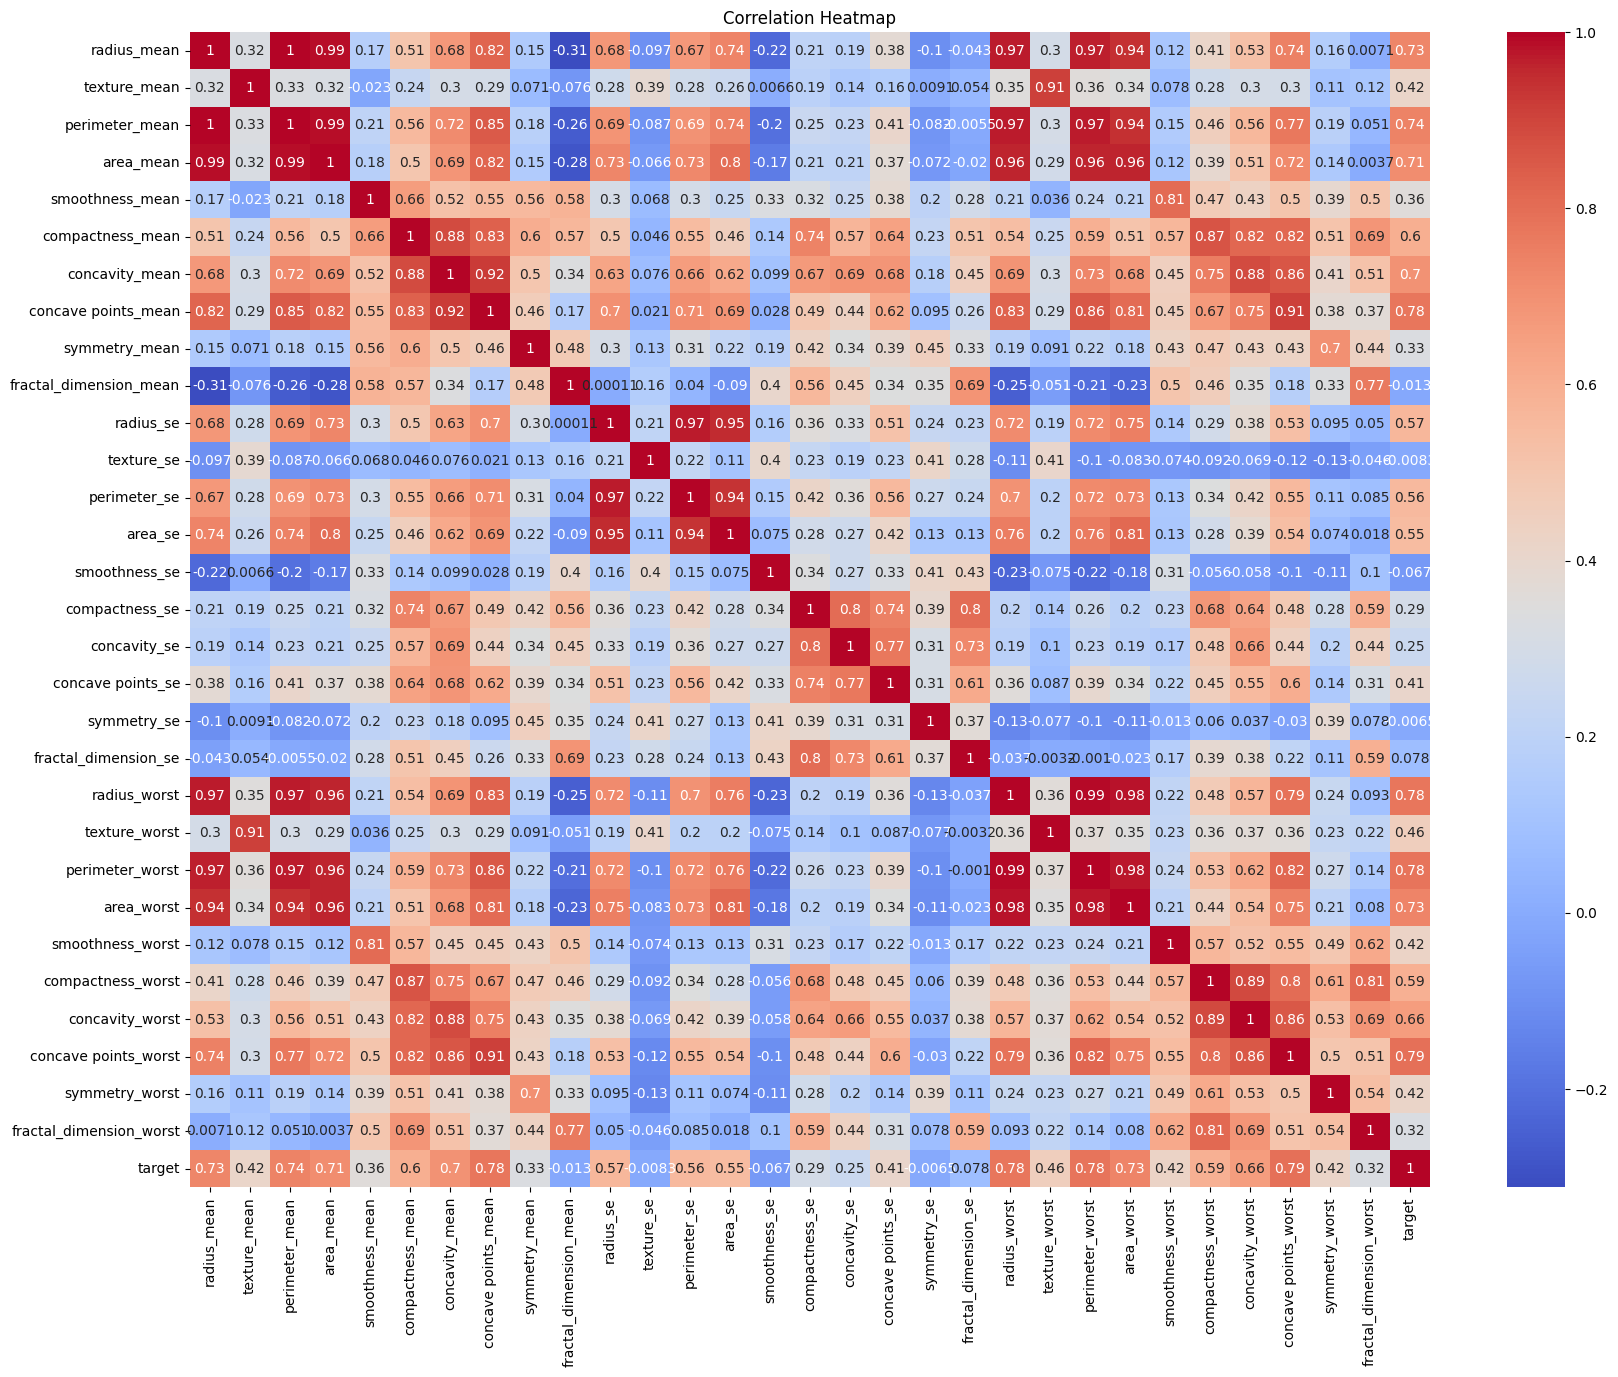

In [135]:
# Explore the correlation between features:

plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")